# Working with original data

## Parsing initial data into folders: images, masks

In [5]:
!ls data/original_data/1

edema_auto.png	edema_expert.png  gd.png


In [26]:
from glob import glob
import shutil
import os

In [19]:
os.makedirs('data/original_data/masks')
os.makedirs('data/original_data/images')

In [ ]:
os

In [20]:
files = glob('data/original_data/*/*expert.png', recursive=True)

In [23]:
'data/original_data/13/edema_expert.png'.split('/')[-2]

'13'

In [25]:
for path in files:
    old_label_path = path
    old_image_path = path.replace('edema_expert', 'gd')
    
    eye_idx = path.split('/')[-2]
    
    new_label_path = os.path.join(f'data/original_data/masks/{eye_idx}.png')
    new_image_path = os.path.join(f'data/original_data/images/{eye_idx}.png')
    
    os.replace(old_label_path, new_label_path)
    os.replace(old_image_path, new_image_path)
    
    [shutil.rmtree(os.path.split(path)[0]) for path in files]

## Ben Graham's preprocessing method

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [77]:
img = cv2.imread('data/original_data/images/1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (1024, 1024))

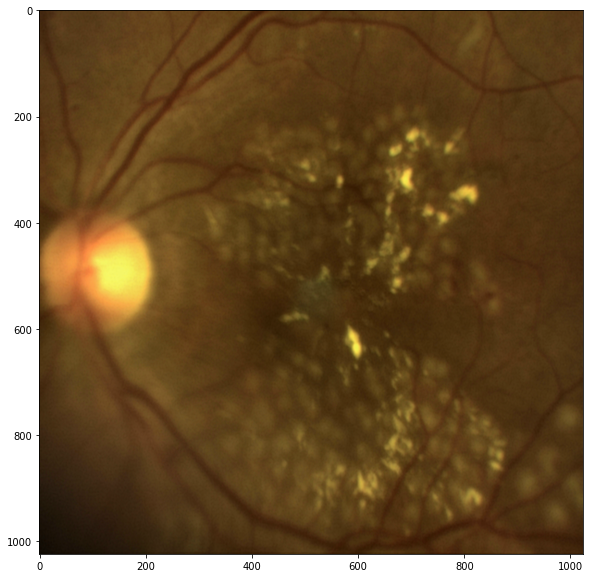

In [78]:
plt.figure(figsize=(10, 10))
plt.imshow(img)

Use sigmaX=10 with 512x512 images 

Use sigmaX=25 with 1024x1024 images 

In [111]:
post_img = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), 25), -4, 128)

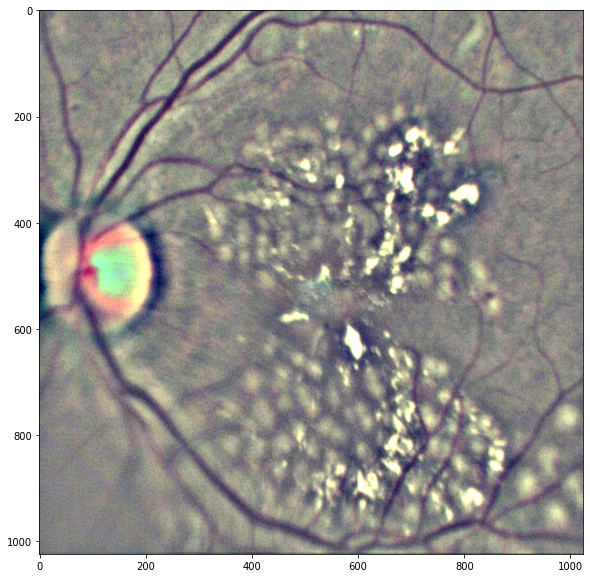

In [112]:
plt.figure(figsize=(10, 10))
plt.imshow(post_img)

In [68]:
img_10 = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), sigmaX=10), -4, 128)
img_30 = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), sigmaX=30), -4, 128)
img_50 = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), sigmaX=50), -4, 128)

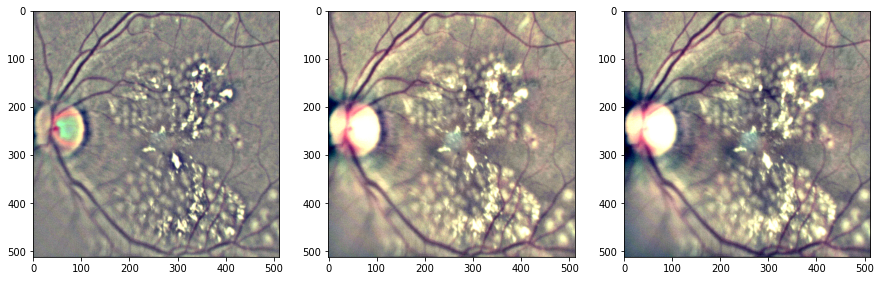

In [69]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))
ax1.imshow(img_10)
ax2.imshow(img_30)
ax3.imshow(img_50)

# Preprocess all images

In [75]:
os.makedirs('data/processed_data/images')
os.makedirs('data/processed_data/masks')

In [74]:
def BenGrahamPreprocessing(image): 
    return cv2.addWeighted(image, 4, cv2.GaussianBlur(image, (0, 0), 10), -4, 128)

In [72]:
files = glob('data/original_data/images/*.png')

In [76]:
for path in files:
    image_path = path
    mask_path = path.replace('images', 'masks')
    result_image_path = image_path.replace('original_data', 'processed_data')
    result_mask_path = mask_path.replace('original_data', 'processed_data')
    
    image = cv2.imread(image_path)
    image = cv2.resize(image, (512, 512))
    image = BenGrahamPreprocessing(image)
    
    mask = cv2.imread(mask_path)
    mask = cv2.resize(mask, (512, 512), interpolation=cv2.INTER_NEAREST)
    
    cv2.imwrite(result_image_path, image)
    cv2.imwrite(result_mask_path, mask)

# Preprocess images for classic fundus segmentation

In [97]:
data_path = '/raid/rustam/med_data/data_2021_fixed/3_fold_cv/new_fold_2'

In [100]:
train_images = glob(os.path.join(data_path, 'train', 'images', '*.bmp'))
test_images = glob(os.path.join(data_path, 'test', 'images', '*.bmp'))

In [101]:
test_images

['/raid/rustam/med_data/data_2021_fixed/3_fold_cv/new_fold_2/test/images/54.bmp',
 '/raid/rustam/med_data/data_2021_fixed/3_fold_cv/new_fold_2/test/images/24.bmp',
 '/raid/rustam/med_data/data_2021_fixed/3_fold_cv/new_fold_2/test/images/74.bmp',
 '/raid/rustam/med_data/data_2021_fixed/3_fold_cv/new_fold_2/test/images/70.bmp',
 '/raid/rustam/med_data/data_2021_fixed/3_fold_cv/new_fold_2/test/images/63.bmp',
 '/raid/rustam/med_data/data_2021_fixed/3_fold_cv/new_fold_2/test/images/62.bmp',
 '/raid/rustam/med_data/data_2021_fixed/3_fold_cv/new_fold_2/test/images/95.bmp',
 '/raid/rustam/med_data/data_2021_fixed/3_fold_cv/new_fold_2/test/images/1.bmp']

In [103]:
from tqdm import tqdm

In [104]:
def process_images(image_paths):
    for image_path in tqdm(image_paths):
        image = cv2.imread(image_path)
        image = BenGrahamPreprocessing(image)
        cv2.imwrite(image_path, image)

In [105]:
process_images(train_images)
process_images(test_images)

100%|██████████| 8/8 [00:00<00:00, 25.13it/s]


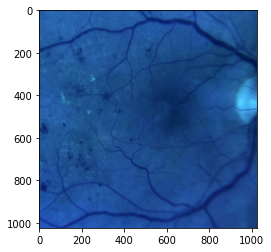

In [106]:
plt.imshow(cv2.imread('/raid/rustam/med_data/data_2021_fixed/3_fold_cv/fold_2/train/images/57.bmp'))

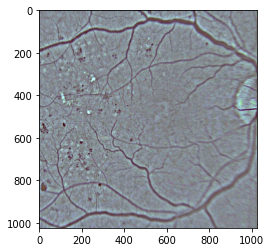

In [107]:
plt.imshow(cv2.imread('/raid/rustam/med_data/data_2021_fixed/3_fold_cv/new_fold_2/train/images/57.bmp'))